In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Visualization Techniques
There are many options for beginner data scientists to visualize data and I've selected Seaborn because it builds on top of Matplotlib which we have now become more familiar with. Seaborn is a data visualization library that provides a high-level, informative statistical graphics, this declarative API is perfect for my project since I want to explore data and see if a correlation exists ang gain some general insights about the skincare dataset. 

# Skincare Products Data Exploration
I have a great curiosty and passion for the cosmetics industry, from how a product is made to how it is sold. I'll be exploring a rich dataset I obtained from [Kaggle](https://www.kaggle.com/datasets/eward96/skincare-products-and-their-ingredients) , which itself sourced this data from [lookfantastic.com](https://www.lookfantastic.com), an online retailer of beauty products. Sometimes a product is touted for being made up of a variety of different ingredients, othertimes, for exactly the opposite, for using only the bare minimun. Ever curious about how a product is priced, I will determine if there exists a telling relationship between the number of ingredeints in a product and its price. Critical to pricing stratgey is the quatity of the product, so I will also explore the relationship between between price and quantity. 

Another particular interest I have is categorizing the products a brand sells; which brands sell a variety of different products, and which don't. As a consumer of these products, I see this on the shelves of a store, but as a data scientist, I want to visualize, far more effectively, this data. 

# Selecting a Data Visualization Library
To visualize the correlation between two variables, price and number of ingredients, and price and quantity, I will use a regression plot and a heatmap. Both these plots will not only indicate the direct or indirect relationship between two variables, but also the strength of the relationship, if one exists at all. 
I will be using the `seaborn` library, an open source data visualization library based on matplotlib. I will install this library using `pip`, a python package installer. One reason I will use `seaborn`, instead of its underlying `matplotlib`, is that it is easier to generate multiple figures. Although `matplotlib` is more customizable, it would mean I have to be more verbose and specific in how I want to create my plots; scanning through the documentation of `seaborn` I find that it requires far less boilerplate code to generate a plot, and I value this. (I also like many of `seaborn's` default themes.) Finally, `seaborn` is especially intended to be used for statistical plotting, which I aim to do. If I was visualizing geolocation data, for instance, then I would certainly resort to using `matplotlib`.  

website: https://seaborn.pydata.org

# Load data
I downloaded data from Kaggle, uploaded it to the `assets` folder of my notebook, and loaded it into a pandas dataframe. I then removed column(s) I found unimportant.

In [2]:
df = pd.read_csv('./assets/skincare_products.csv')
df = df.drop(['product_url'], axis=1)
print("There are {} rows and {} columns in the original df".format(df.shape[0], df.shape[1]))
df.head()

There are 1138 rows and 4 columns in the original df


,product_name,product_type,ingredients,price
0,The Ordinary Natural Moisturising Factors + HA...,Moisturiser,"Aqua (Water), Caprylic/Capric Triglyceride, Ce...",£5.20
1,CeraVe Facial Moisturising Lotion SPF 25 52ml,Moisturiser,"Aqua/Water, Homosalate, Glycerin, Octocrylene,...",£13.00
2,The Ordinary Hyaluronic Acid 2% + B5 Hydration...,Moisturiser,"Aqua (Water), Sodium Hyaluronate, Sodium Hyalu...",£6.20
3,AMELIORATE Transforming Body Lotion 200ml,Moisturiser,"Aqua/Water/Eau, Ammonium Lactate, C12-15 Alkyl...",£22.50
4,CeraVe Moisturising Cream 454g,Moisturiser,"Purified Water, Glycerin, Ceteareth-20 and Cet...",£16.00


# Data Cleaning Part 1: regression analysis
The `ingredients` column is a comma separated string of all the ingredients used in a given product. I will first convert this column into a list, and then create a new column containing the number of ingredients.
Given the source of this data, the price amount is in Pounds, I will convert this to USD.
From the `product_name` column, I will extract the quantity of the of product. 

In [3]:
# convert string containing the ingredients to a list
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(', ')) 
# convert the price, in string, to a float
df['price'] = df['price'].apply(lambda x: float(x.split('£')[1]))
# covert price of a product from pounds to USD; 1.32 is the conversion rate as of March 23rd 2022
df['Price in USD'] = df['price'].apply(lambda x: x*1.32)
# remove the price column column 
df = df.drop(['price'], axis=1) 
# create a new column in my df that contains the number of ingredients per product
df['No. of Ingredients'] = df['ingredients'].apply(lambda x: len(x)) 

In [4]:
# function to get quantity; will return unitless number.
def get_quantity(row): 
    if "ml" in row:
        y = row.split("ml")[0][-3:]
        y = y.strip()
        y = y.strip("()")
        return y
    else:
        y2 = row.split(" ")[-1]
        y2 = y2.strip()
        y2 = y2.strip("()")
        y2 = y2.strip('g') #some products are in grams instead of mililiter (mL) so I used 1 gram = 1 mL because the density of water (main component of skincare products)
        return y2

In [5]:
def get_float(row): #This function converts the volumne
    if row.isnumeric():
        return float(row)
    else:
        return np.nan

In [6]:
df['quantity'] = df['product_name'].apply(lambda x: get_quantity(x))
df['quantity'] = df['quantity'].apply(lambda x: get_float(x)) #This column quantity contains the volume of product in mL

# Regression Plots

Text(0, 0.5, 'Price in USD')

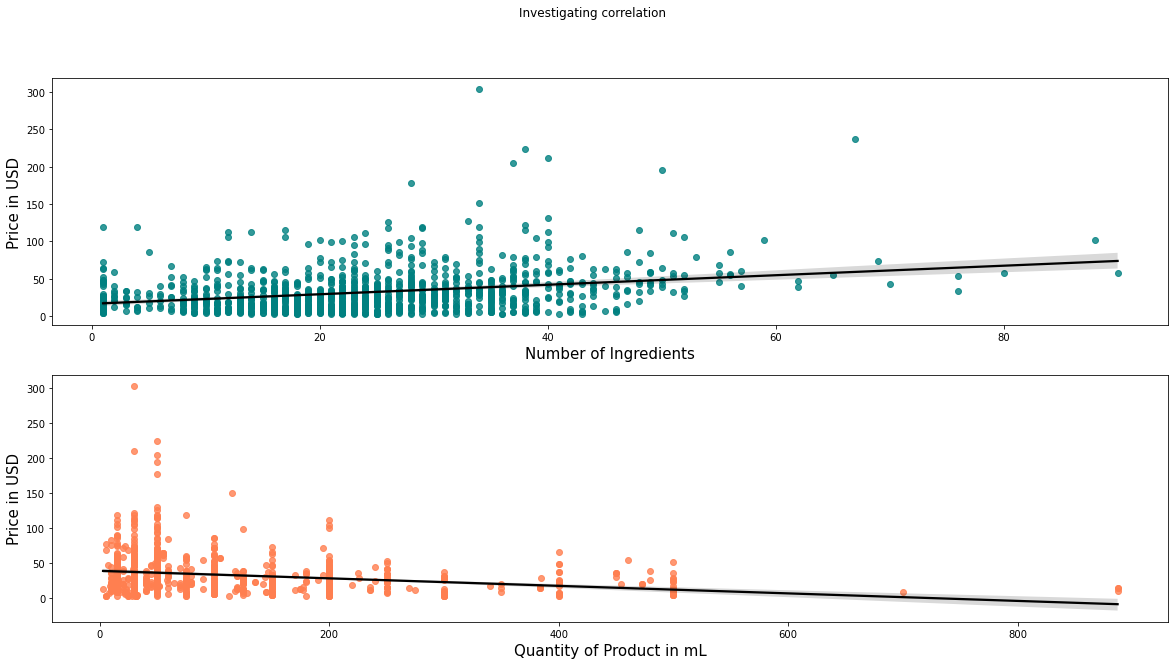

In [7]:
fig, axes = plt.subplots(2, 1, sharex=False,figsize=(20,10))
fig.suptitle('Investigating correlation')

first = sns.regplot(data=df, ax=axes[0], x="No. of Ingredients", y="Price in USD", scatter_kws={"color": "teal"}, line_kws={"color": "black"})
first.set_xlabel("Number of Ingredients", fontsize = 15)
first.set_ylabel("Price in USD", fontsize = 15)

second = sns.regplot(data=df, ax=axes[1], x="quantity", y="Price in USD", scatter_kws={"color": "coral"}, line_kws={"color": "black"})
second.set_xlabel("Quantity of Product in mL", fontsize = 15)
second.set_ylabel("Price in USD", fontsize = 15)

It can be seen that there is, after all, a relationship between the number of ingredients in a product and its price. The positive slope of the line of best fit tells us that it is a positive relationship, but the very subtle slope tells us that this relationship is not strong. This visualization suggests to me that the number of ingredients going into a product is not a very telling indicator/ predictor of its price.

In the case of the relationship between the quantity of a product and its price, an expected behaviour is observed. As the quantity of the product increases, the less its price. It is to note, however, that this relationship too is very subtle. Further, this given the very few (exactly 2) data points of large-quantity products, a valid follow up investigation would be to perform this analysis after removing these likely anamolous data. 

# Heatmaps

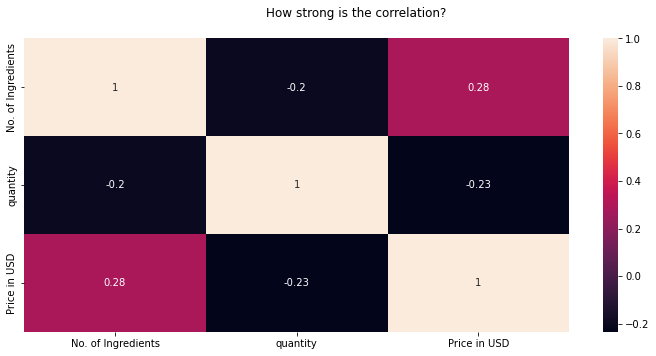

In [8]:
fig, axes = plt.subplots(1,1,figsize=(10,5))
fig.suptitle('How strong is the correlation?')

#heatmap
corrMatrix = df.loc[:, ["No. of Ingredients", "quantity", "Price in USD"]].corr()
sns.heatmap(corrMatrix, annot=True)

fig.tight_layout()

A heatmap is an excellent way to both visualize the relatioship between variables, and quantify them too. As I mentioned, the severity in the relatinonship between these variables is very low, and the heatmap above quanitifies the observation from the regression plot. The relationship between number of ingredients and price is (positive) 0.28, a very low magnitude, and likewise the relationship between quantity and price is (negative) 0.23, a yet lower magnitude. 

# Data Cleaning Part 2: part of whole comparisons
To visualize the variety of products sold by a company, I will first narrow the scope of this exploration. I will extract the brand name of a product from the `product_name` column, and normalize it. Then, I will filter my dataset to only products from the top 10 most common brands (including ties). I will then visualize the variety `product_types` that each of these brands sell, to re-create what one would see at a store.

In [9]:
# create a dictionary for brand names -- from prior domain knowledge
brands_d = {'CeraVe': 'CeraVe', "The Ordinary": "The Ordinary",'Avène': 'Avène', "Omorovicza": "Omorovicza", 'The INKEY': 'The INKEY List', "ManCave": "ManCave", 
        'Origins': 'Origins', "Molton Brown": "Molton Brown", 'COSRX': 'COSRX', "AMELIORATE": "AMELIORATE",
         'Eucerin': 'Eucerin', "Chantecaille": "Chantecaille", "First Aid": "First Aid Beauty", "Bloom and": "Bloom and Blossom", "Jo Malone": "Jo Malone", "Sol de": "Sol de Janeiro",
         'Clinique': 'Clinique', "Aveeno": "Aveeno", 'Bioderma': 'Bioderma', "A'kin": "A'kin", 'Medik8': 'Medik8', "PRAI": "PRAI", "Cowshed RELAX": "RELAX",
         'Avene': 'Avène', "The Chemistry": "The Chemistry Brand", 'PIXI': 'PIXI', "Mama Mio":"Mama Mio", 'VICHY':'VICHY', "Uriage": "Uriage", "MONU": "MONU",
            'Niod': 'NIOD', "NIOD" : "NIOD", "MÁDARA": "MÁDARA", "Shea Moisture": "Shea Moisture", "ManCave":"ManCave", "AHAVA": "AHAVA",
            "Dr.Jart+" : "Dr.Jart+", "Zelens":"Zelens", 'Dermalogica': 'Dermalogica', "Mavala": "Mavala", "Neom": "Neom", "NEOM": "Neom",
           "GLAMGLOW": "GLAMGLOW", "AromaWorks": "AromaWorks", "Weleda": "Weleda", "bareMinerals": "bareMineral", "RENU": "RENU",
           "Garnier": "Garnier", "JASON": "JASON", "Rodial": "Rodial", "Trilogy": "Trilogy", "\nErno Laszlo": "Erno Laszlo", "Erno Laszlo": "Erno Laszlo",
           "Murad": "Murad", "Armani": "Armani", "Aesop": "Aesop", "DHC": "DHC", "Embryolisse": "Embryolisse",
           "Ambre Solaire": "Garnier", "Eucerin®": "Eucerin", "Mauli": "Mauli", "SkinCeuticals": "SkinCeuticals", "OUAI": "OUAI",
           "Neutrogena" : "Neutrogena", "ESPA":"ESPA", "Jurlique": "Jurlique", "Elemis": "Elemis", "ELEMIS": "Elemis", "OSKIA": "OSKIA",
           "Bulldog": "Bulldog", "Aurelia": "Aurelia", "Natio": "Natio", "L'Oréal": "L'Oréal Paris", "Westlab": "Westlab",
           "Caudalie": "Caudalie", "DECLÉOR": "DECLÉOR", "Rituals": "Rituals", "Gallinée": "Gallinée", "Antipodes": "Antipodes", "StriVectin": "StriVectin",
           "NIP+FAB": "NIP+FAB", "ilapothecary": "ilapothecary", "Sukin": "Sukin", "Aveda": "Aveda", "Darphin": "Darphin", "Neutrogena®": "Neutrogena", 
            "NUXE": "NUXE", "APIVITA": "APIVITA", "MAC": "MAC", "FARMACY": "FARMACY", "philosophy": "philosophy", "Filorga": "Filorga"}

In [10]:
# extract brand 
def get_brand(row):
    y = row.split(' ')[:2] #First I'm going to take the first two words of the product name
    y = ' '.join(y)
    return y

#Cleaning the brand name further
def normalize_brand_names(row):
    part_brand = row.split(" ")[0]
    if part_brand in brands_d:
        return brands_d[part_brand]
    elif row in brands_d:
        return brands_d[row]
    else:
        return row

In [ ]:
df['brand'] = df['product_name'].apply(lambda x: get_brand(x)) #I've created a new column by applying the get_brand function to the product_name column
df['brand'] = df['brand'].apply(lambda x: normalize_brand_names(x))

In [ ]:
#Getting the top ten brands in the df, including ties
brand_occs = list(zip(df['brand'].value_counts(), df['brand'].value_counts().index))
top_ten = brand_occs[0:10]
for elm in brand_occs[10:]:
    if elm[0] == top_ten[-1][0]:
        top_ten.append(elm)
top_ten_brands = [t[1] for t in top_ten]
df_top_ten = df.loc[df['brand'].isin(top_ten_brands)]

# Categorical Distribution Plots

From the graph above I notice that brands like Garnier sell only a few types of products, namely masks and toners, where as brands like Clinque sells many more products than just masks and toners. Plotting this distribution of product types against prices also shows that similar products, like moisturisers and serums, are sold at high prices, regardless of brands, and functionally similar products like cleansers, balms, toners and exfoliators are relatively cheaper and therefore sold at a similar price. 

Text(0.5, 1.0, 'Product type distribution by Top Ten Popular Brands')

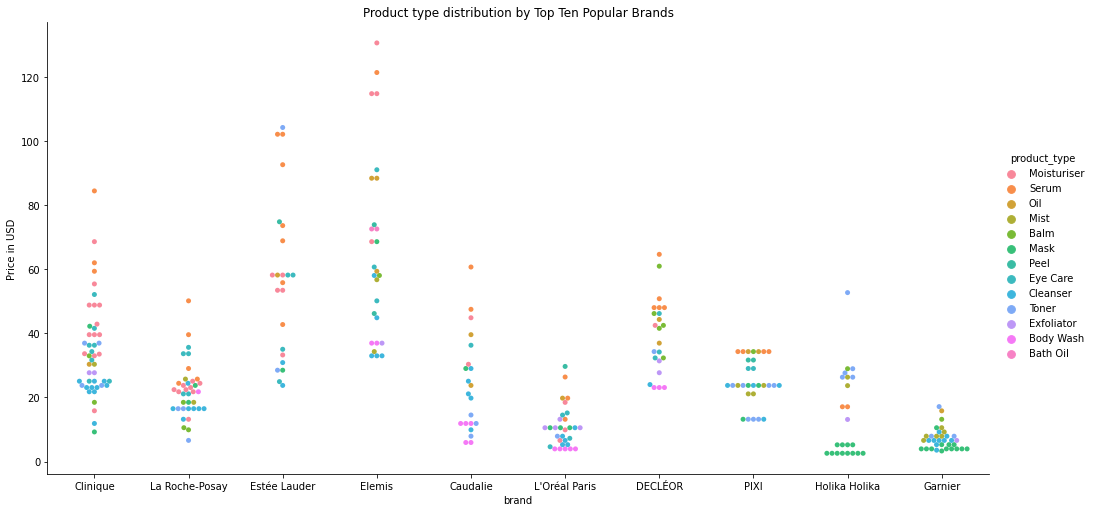

In [13]:
#Here I'm interested in visualizing the various product categories by brand and see their price distribution
sns.catplot(data=df_top_ten, kind="swarm", x='brand', y="Price in USD", hue="product_type", height=7, aspect=2)
plt.title("Product type distribution by Top Ten Popular Brands")

# Box Plots

In [14]:
idx = df.median().sort_values().index
df[idx].head()

,No. of Ingredients,Price in USD,quantity
0,46,6.864,30.0
1,32,17.160,52.0
2,17,8.184,30.0
3,38,29.700,200.0
4,24,21.120,454.0


Text(0.5, 1.0, 'Price distribution by Product type')

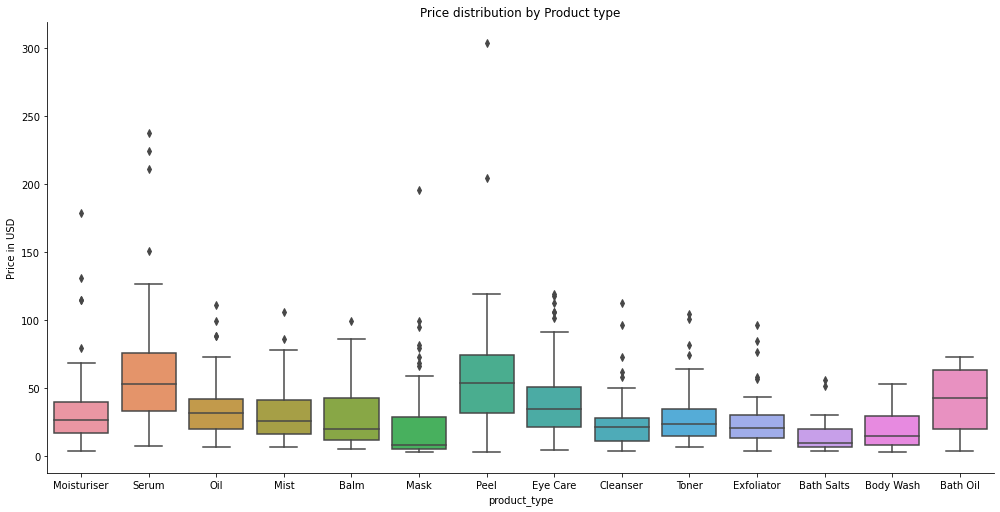

In [15]:
sns.catplot(data=df, x='product_type', y="Price in USD", kind="box", height=7, aspect=2)
plt.title("Price distribution by Product type")

I wanted to visualize the price distribution of each product type and though the distributions are similar among product types, moisturizers, serums and peels have the costliest items. From the box plot above I can see that only 'Body Wash' and 'Bath Oil' product types have no outliers, which tells me that there aren't any "out of the box" bath washes and bath oils in this data set and probably on the market, which in all honestly, is for our best. 